In this file, we'll learn new things about exploratory data visualization. We'll conttinue using the bike sharing dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

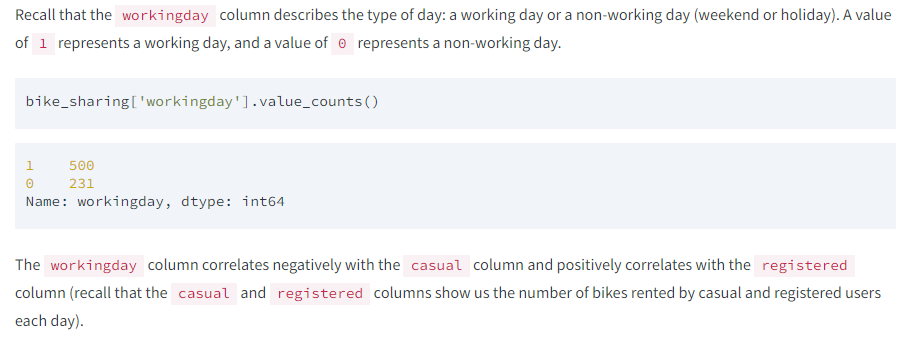

In [2]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

These values suggest that **registered users** tend to use the bikes more on **working days** — to commute to work probably. On the other side, **casual users** tend to rent the bikes more on the **weekends** and **holidays** — probably for some leisure time.

To corroborate or disprove these observations, we'll **calculate the average number of rentals for casual and registered users on working and non-working days**.

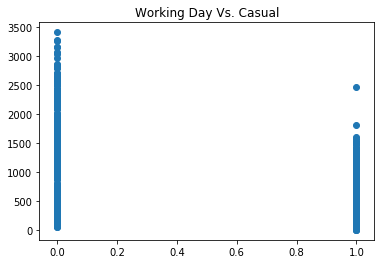

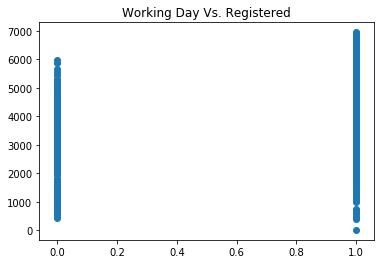

In [3]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

Above we found a pattern that is potentially true: **registered users** tend to use the bikes more on the **working days**, while **casual users** tend to rent the bikes more on the **weekends and holidays**.

We corroborated this hypothesis with the **average number of rentals we see for casual and registered users on working and non-working days**:

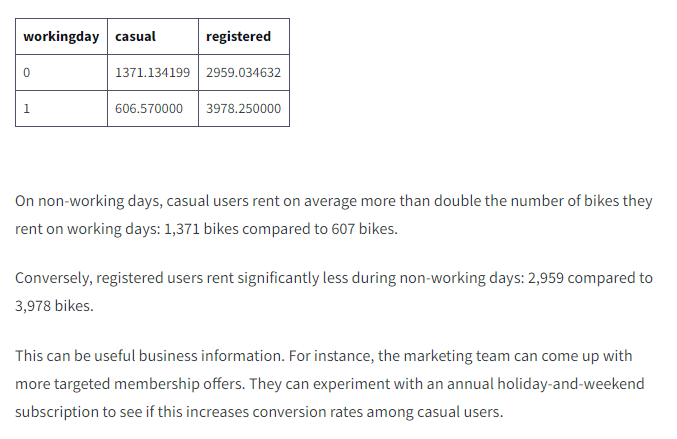

To get a visual estimate of the data in our table above, we can use a **bar plot** (also called a **bar chart**).

For instance, this is how the bar plot for the **casual users averages looks** — we can generate a bar plot using the [`plt.bar()` function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html):

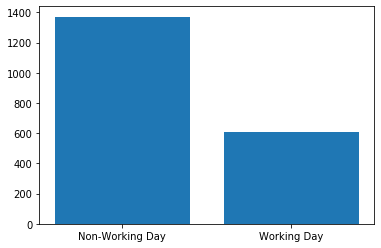

In [4]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

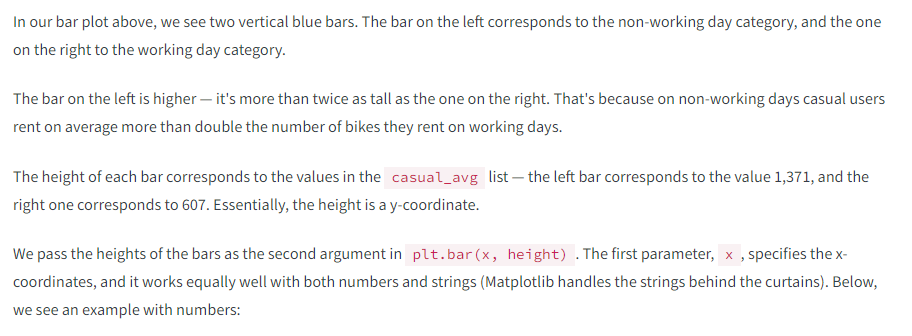

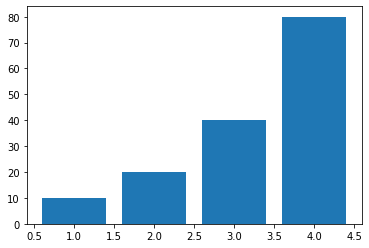

In [5]:
plt.bar(x=[1,2,3,4], height=[10,20,40,80])
plt.show()

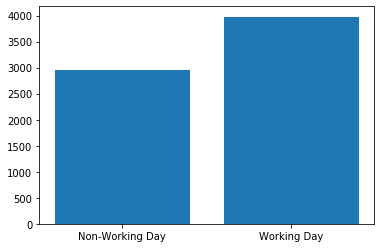

In [6]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]
plt.bar(working_days, registered_avg)
plt.show()

Above, the data indicates that **registered users tend to use the bikes more on working days**, while **casual users tend to rent the bikes more on weekends and holidays**.

We can also take a more granular approach to analyzing the data and examine the average number of rentals for **casual and registered users** based **on the day of the week (Monday, Tuesday, Wednesday, etc.)**.

The `weekday` column in our dataset describes the day of the week (`0` is **Sunday**, and `6` is `Monday`):

In [7]:
bike_sharing['weekday'].value_counts().sort_index()
# We use Series.sort_index() to sort the index in an ascending order

0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: weekday, dtype: int64

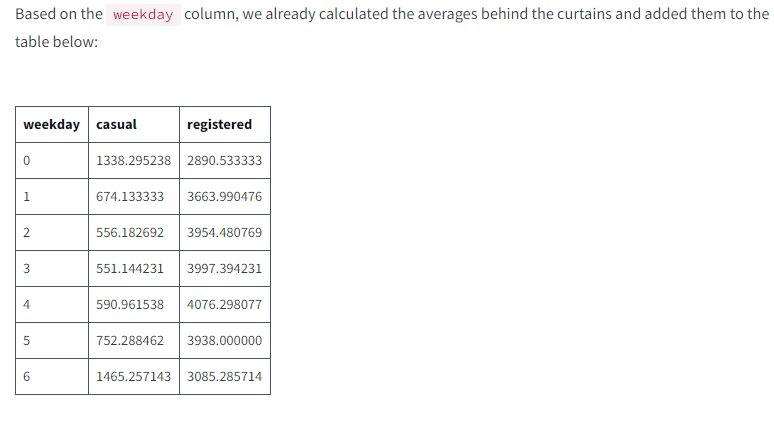

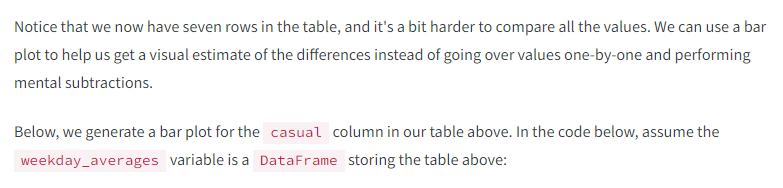

In [8]:
weekday_averages = bike_sharing.groupby('weekday').mean()[['casual', 'registered']].reset_index()

In [9]:
weekday_averages.head()

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077


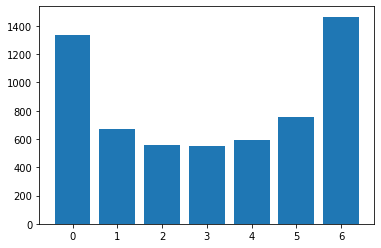

In [10]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.show()

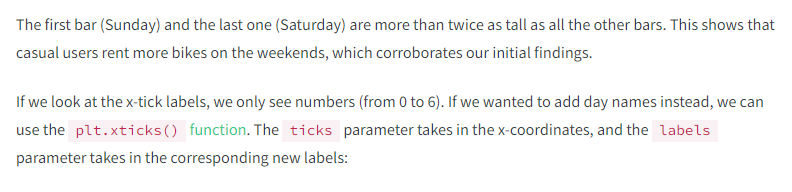

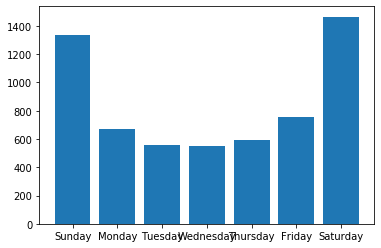

In [11]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday'])
plt.show()

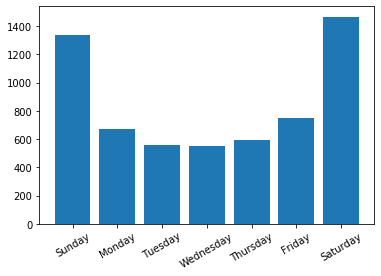

In [12]:
# rotate x-ticks
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],rotation=30)
plt.show()

Another solution is to flip all the bars horizontally.

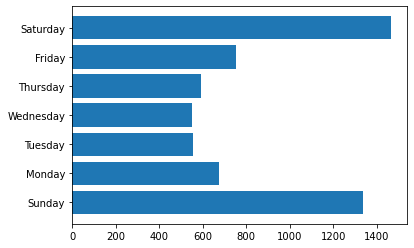

We call this a **horizontal bar plot**. The average numbers of **bikes rented** are now on the `x-axis`, and the **day names** are on the `y-axis`. 

We're now talking about **bar widths** instead of **bar heights**.

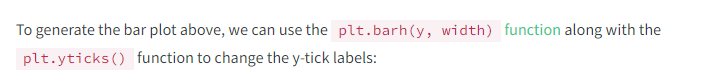

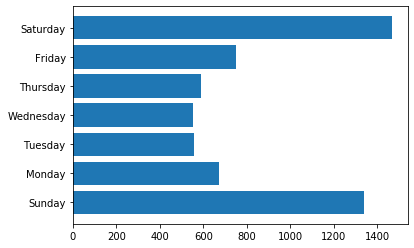

In [13]:
plt.barh(weekday_averages['weekday'], weekday_averages['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

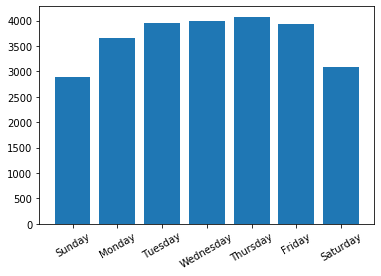

In [14]:
plt.bar(weekday_averages['weekday'], weekday_averages['registered'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

Our dataset describes bike sharing activity for the **Capital Bikeshare company in Washington, D.C**. Let's say the company has decided to open up a new bike sharing system in another American city.

Weather patterns are going to play an important part in choosing the next location. We're asked to pull up some weather data about Washington, D.C. — the decision-making team wants to use that as a benchmark for evaluating other cities.

One useful column is `weathersit`, which describes the daily weather type. Let's look at the unique values and the number of times each occurs:

In [15]:
bike_sharing['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

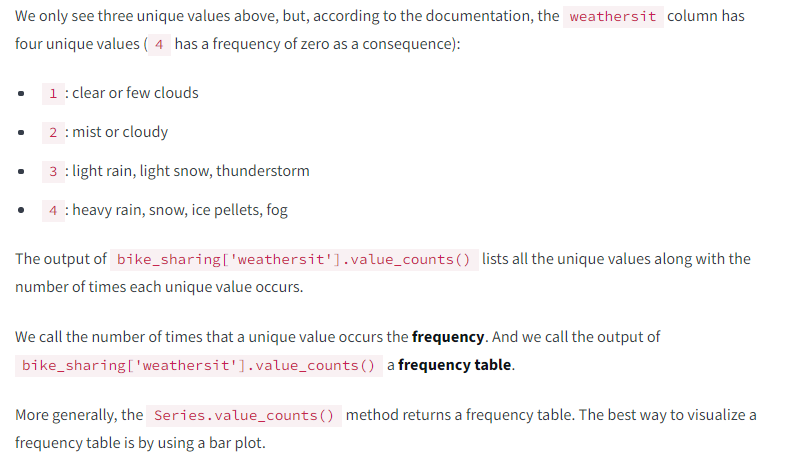

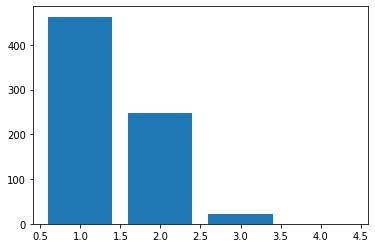

In [16]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

**Bar plots** work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.

* **Bar plots** work well when generating the frequency tables for **categorical** columns. 
* For **numerical*** columns, we need to use a **histogram** — a graph type that we'll learn about later 

We're going to visualize weather patterns in Washington, D.C. for `2011` and `2012` individually. This will help us see if the weather is consistent from year to year.

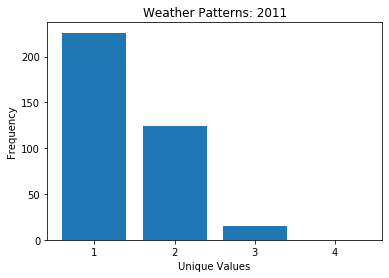

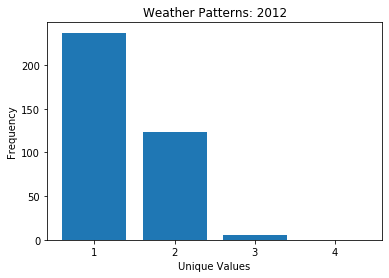

In [17]:
unique_values = [1, 2, 3, 4] # all the unique values of the weathersit column.
weather_2011 = [226, 124, 15, 0] #  the frequency of each unique value for the year 2011 only 
weather_2012 = [237, 123, 6, 0] #  the frequency of each unique value for the year 2012 only 

plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

plt.bar(unique_values, weather_2012)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

Above, we generated a frequency table for the `weathersit` column.

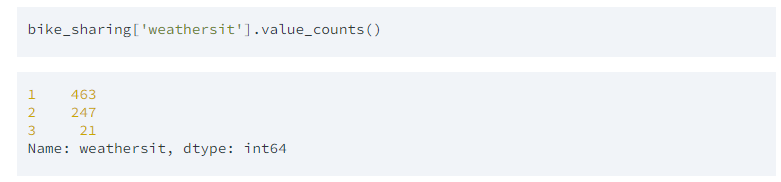

The table is fairly straightforward to read and interpret. For most days (`463 days`), the sky is clear or has a few clouds. However, there are also days (`247 days`) where we see mist or the sky is cloudy.

Quite rarely (`21 days` in two years), we have light rains, light snows, or thunderstorms. Also, heavy rains or snows are extremely rare in Washington, D.C. (no occurrences in `2011` and `2012`).

However, if we generate a frequency table for the `cnt` column (which describes the total number of bike rentals), it's almost impossible to distinguish any pattern. And that's because `cnt` has `696` unique values (below, we see a truncated table).

In [18]:
bike_sharing['cnt'].value_counts()

5119    2
4401    2
1977    2
6824    2
5191    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 696, dtype: int64

To solve this problem, we can group the unique values into equal intervals. Below, we group the table into ten equal intervals by using the `bins=10` argument inside the `Series.value_counts()` method:

In [19]:
bike_sharing['cnt'].value_counts(bins=10)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64

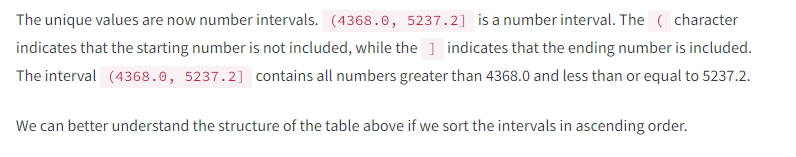

With a quick look at the table, we can make a few observations:

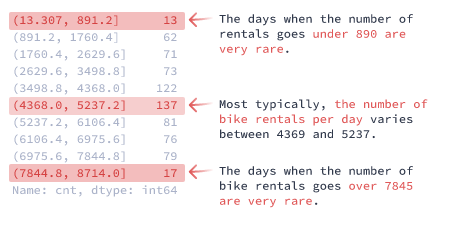

As a side note, the number of intervals in a grouped frequency table can vary — we can have 5, 6, 7, 10, 15, etc. Generally, 10 intervals is a good choice because it offers a good balance between information and comprehension.

We're going to generate grouped frequency tables for the `registered` and `casual` columns. 

In [20]:
registered_freq = bike_sharing['registered'].value_counts(bins=10).sort_index()
casual_freq = bike_sharing['casual'].value_counts(bins=10).sort_index()

In [21]:
registered_freq

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64

In [22]:
casual_freq

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64

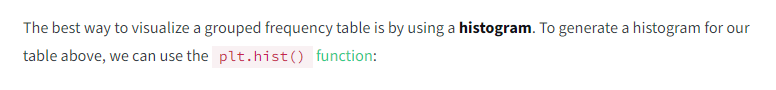

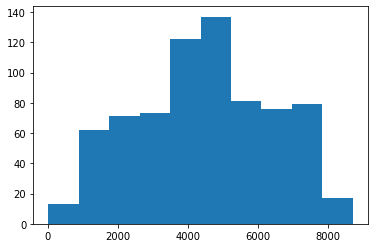

In [23]:
plt.hist(bike_sharing['cnt'])
plt.show()

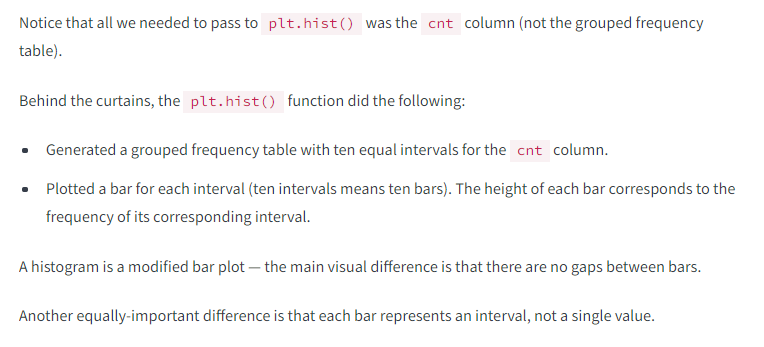

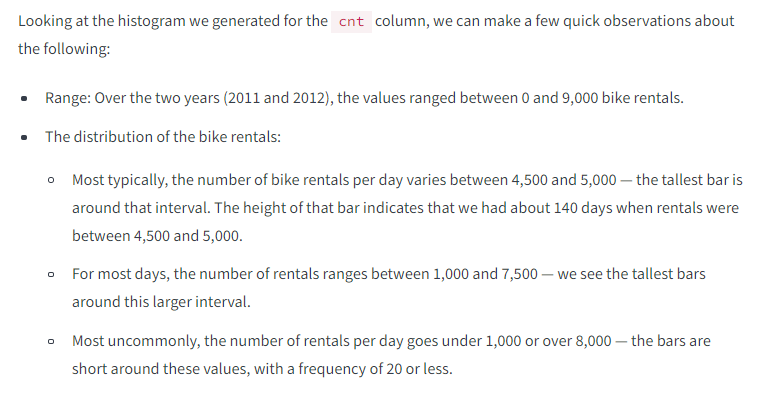

Histograms are one of the most common graphs we use in exploratory data visualization. They quickly show us the distribution of the values, which in turn can suggest important patterns 

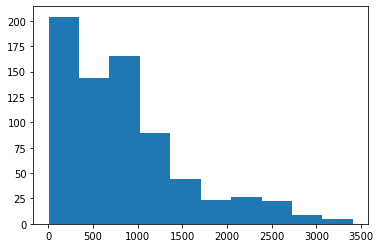

In [24]:
plt.hist(bike_sharing['casual'])
plt.show()

Above, we started by generating a histogram for the `cnt` column. Then, we plotted a histogram for the `casual` column. Notice that the two histograms have different shapes:

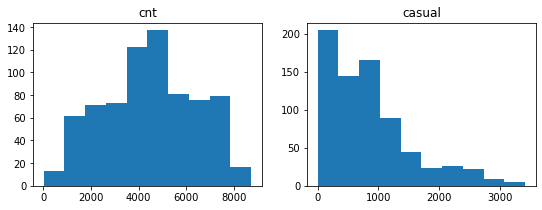

It's useful to examine the shape of a histogram because it shows us the distribution of the values.

We often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide the histogram in two halves that are mirror images of one another.

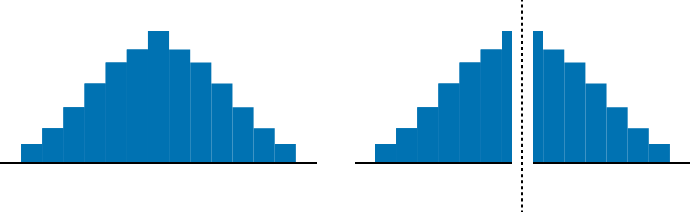

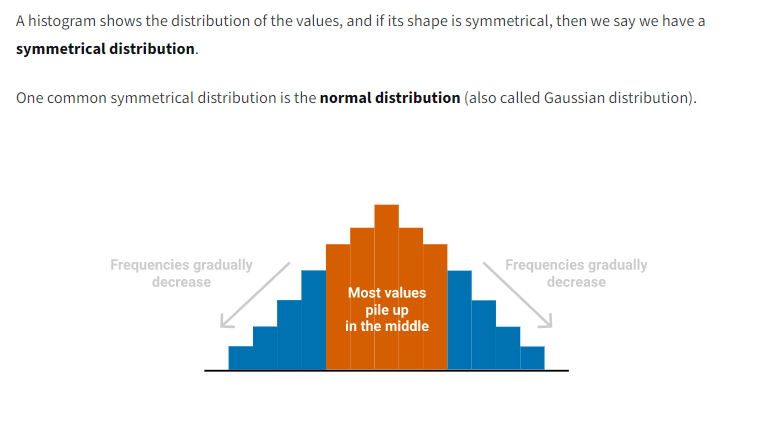

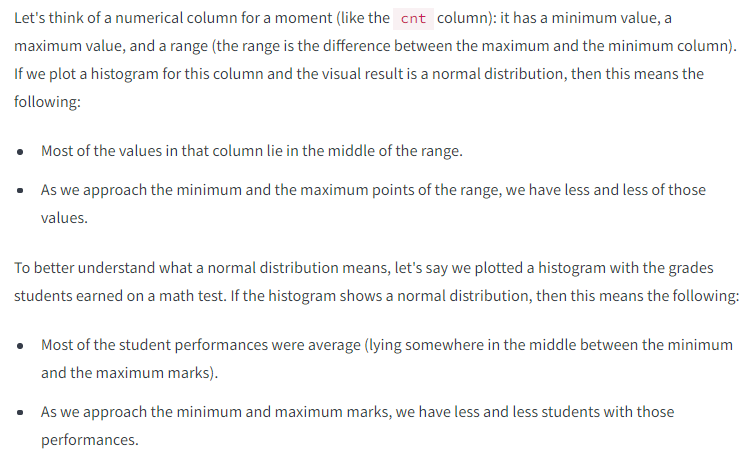

**Task**

The histogram below shows the distribution of the `registered` column.

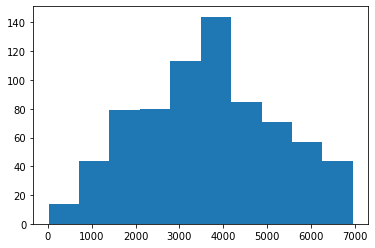

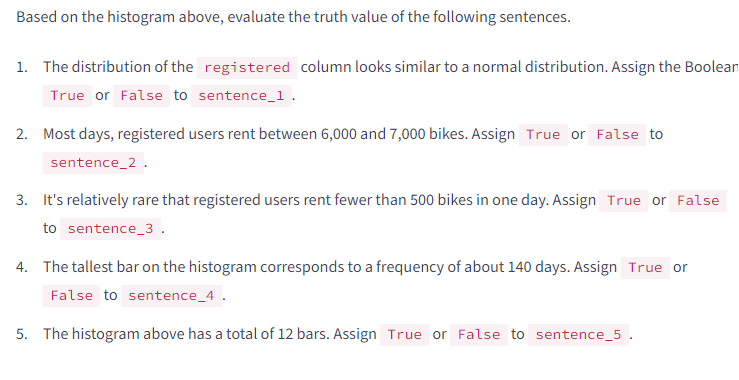

**Answer**

In [25]:
sentence_1 = True
sentence_2 = False
sentence_3 = True
sentence_4 = True
sentence_5 = False

Above we introduced the **normal distribution** as an example of a **symmetrical distribution**.

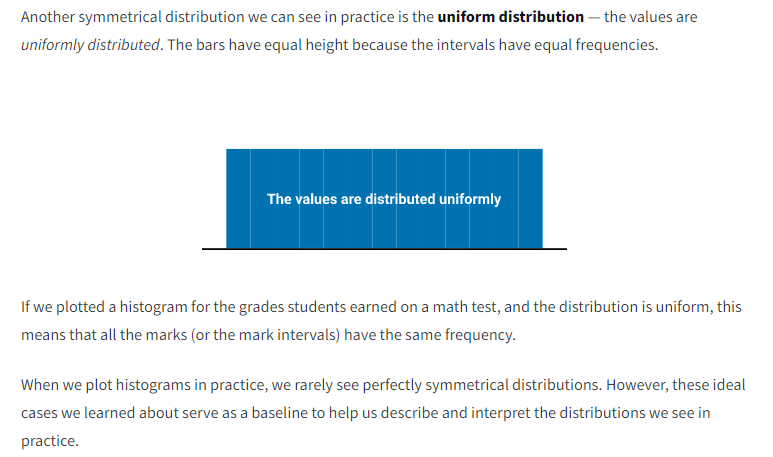

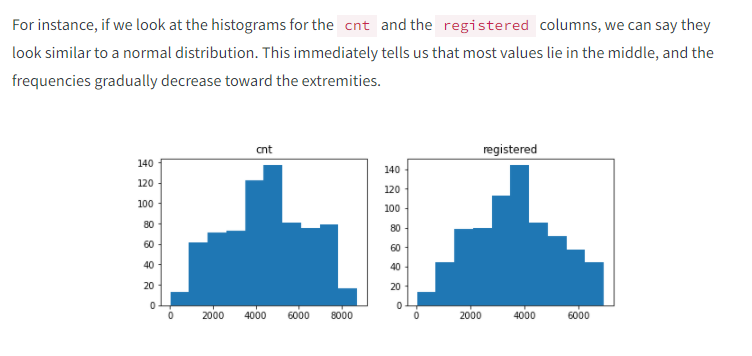

**Task**

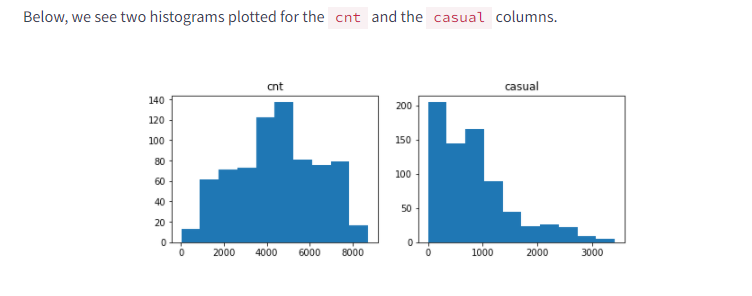

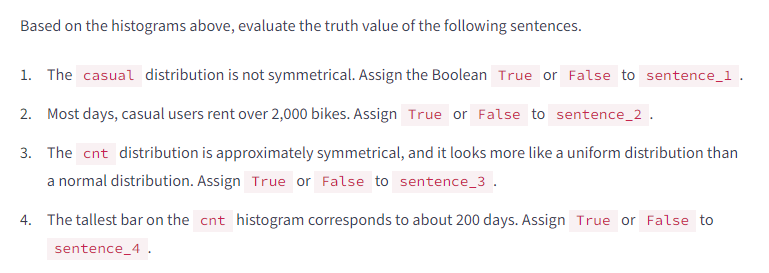

**Answer**

In [26]:
sentence_1 = True
sentence_2 = False
sentence_3 = False
sentence_4 = False

Above, we learned about symmetrical distributions. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide it into two halves that are mirror images of one another.

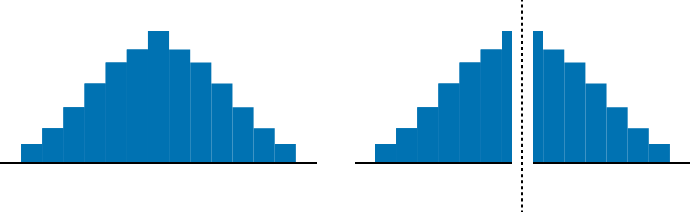

Not all histogram shapes are symmetrical though. The histogram of the `casual` column, for instance, shows a cluster of tall bars located on the left side of the x-axis.

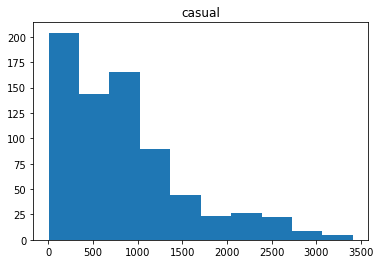

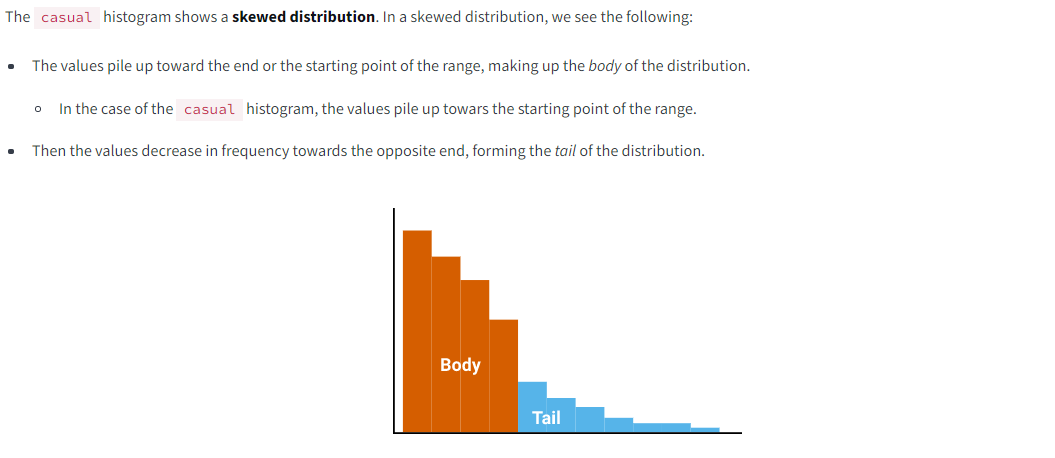

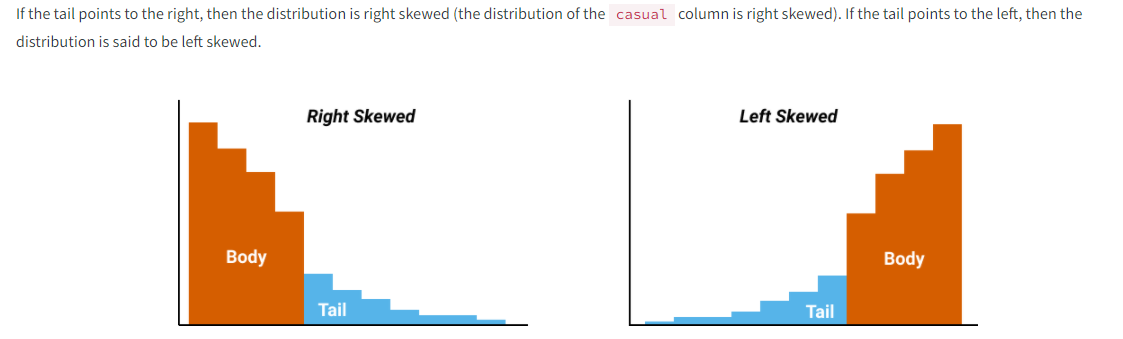

When the tail points to the left, it also points in the direction of negative numbers (on the x-axis, the numbers decrease from right to left). For this reason, a **left-skewed** distribution is sometimes also said to have a **negative skew**.

When the tail points to the right, it also points in the direction of positive numbers. As a consequence, **right-skewed** distributions are also said to have a **positive skew**.